# non Normal Distribution data convert into Normal Distribution data

In [23]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [33]:
dataset = pd.read_csv(r"C:\Users\Mega Computers\Downloads\archive (1)\loan.csv")
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [34]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\Mega Computers\AppData\Local\Temp\ipykernel_11384\1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


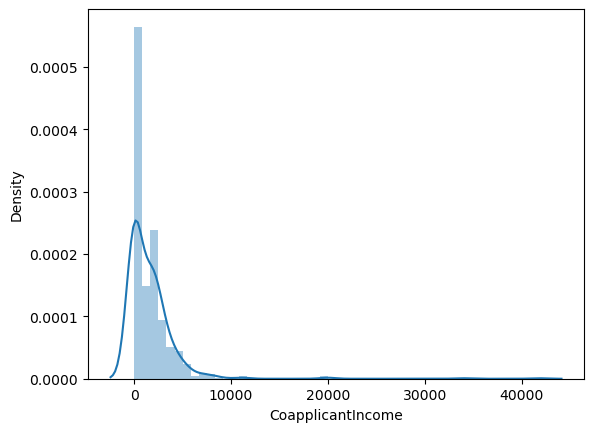

In [35]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [36]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


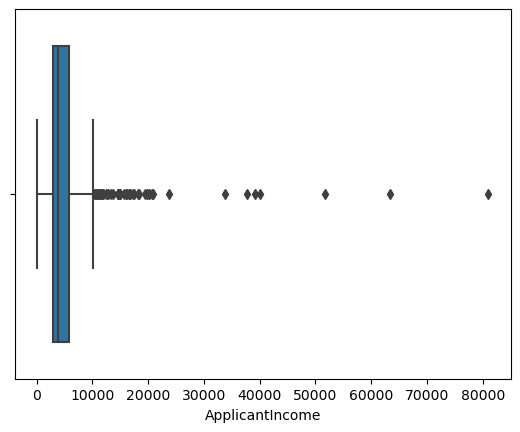

In [37]:
sns.boxplot(x = "ApplicantIncome" , data=dataset)
plt.show()

In [38]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)
q3

2297.25

In [9]:
IQR = q3-q1
IQR

2297.25

In [13]:
min_range = q1 -(1.5*IQR)
max_range = q3 + (1.5*IQR)
max_range ,min_range  

(5743.125, -3445.875)

In [17]:
# dataset = dataset[dataset["CoapplicantIncome"]<= max_range]

In [ ]:
new_dataset = dataset[dataset["CoapplicantIncome"]<= max_range]

In [15]:
new_dataset.shape

(596, 13)

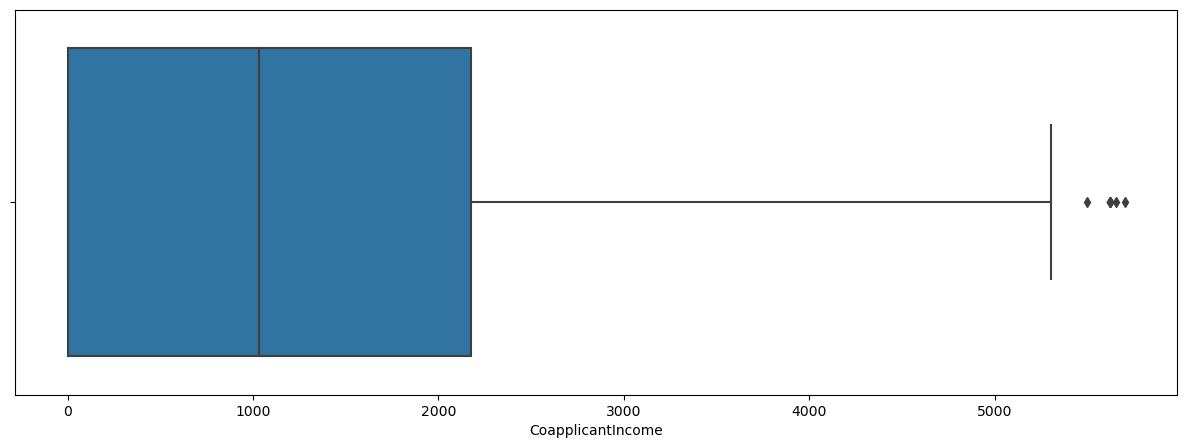

In [16]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "CoapplicantIncome" , data=new_dataset)
plt.show()

In [39]:
from sklearn.preprocessing import FunctionTransformer

In [40]:
ft = FunctionTransformer(func=np.log1p)


In [41]:
ft.fit(dataset[["CoapplicantIncome"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [42]:
dataset["CoapplicantIncome_tf"]=ft.transform(dataset[["CoapplicantIncome"]])

C:\Users\Mega Computers\AppData\Local\Temp\ipykernel_11384\3103206775.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
C:\Users\Mega Computers\AppData\Local\Temp\ipykernel_11384\3103206775.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIn

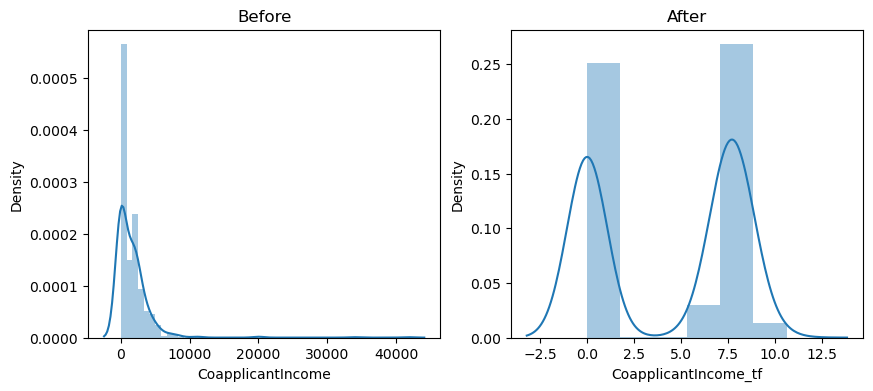

In [43]:
plt.figure(figsize=(10 ,4))
plt.subplot(1,2,1)
sns.distplot(dataset["CoapplicantIncome"])
plt.title("Before")

plt.subplot(1,2,2)
sns.distplot(dataset["CoapplicantIncome_tf"])
plt.title("After")
plt.show()

In [45]:
ft1 = FunctionTransformer(func= lambda x : x**2)
ft1.fit(dataset[["CoapplicantIncome"]])
dataset["CoapplicantIncome_tf1"]=ft1.transform(dataset[["CoapplicantIncome"]])

C:\Users\Mega Computers\AppData\Local\Temp\ipykernel_11384\810659828.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])
C:\Users\Mega Computers\AppData\Local\Temp\ipykernel_11384\810659828.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantInco

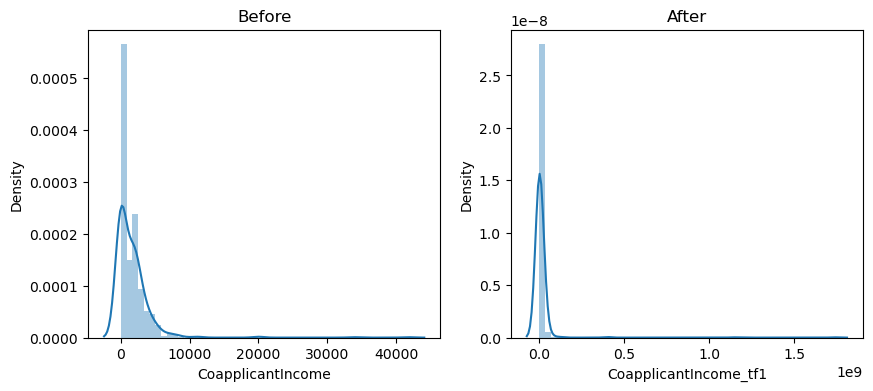

In [46]:
plt.figure(figsize=(10 ,4))
plt.subplot(1,2,1)
sns.distplot(dataset["CoapplicantIncome"])
plt.title("Before")

plt.subplot(1,2,2)
sns.distplot(dataset["CoapplicantIncome_tf1"])
plt.title("After")
plt.show()